# HW5 - Karate Club and Girvan-Newman
### Quentin Phillips
### DATA 440 Fall 2023
### 11/12/23

# Q1. Graph the original club

#### Below is the code I used to check the info of the network as well as draw it with the colors of where the members would eventually end up.

####Q: How many nodes (students) eventually go with John and how many with Mr. Hi?

##### The 17 red nodes would join Mr. Hi and the other 17 green nodes would join John.



In [1]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.karate_club_graph()

print("Node\tDegree")
for v in G:
    print('{}\t{}'.format(v, G.degree(v)))

def label_nodes(G):
    labels = {node: str(node) for node in G.nodes()}
    return labels

Node	Degree
0	16
1	9
2	10
3	6
4	3
5	4
6	4
7	4
8	5
9	2
10	3
11	1
12	2
13	5
14	2
15	2
16	2
17	2
18	2
19	3
20	2
21	2
22	2
23	5
24	3
25	3
26	2
27	4
28	3
29	4
30	4
31	6
32	12
33	17


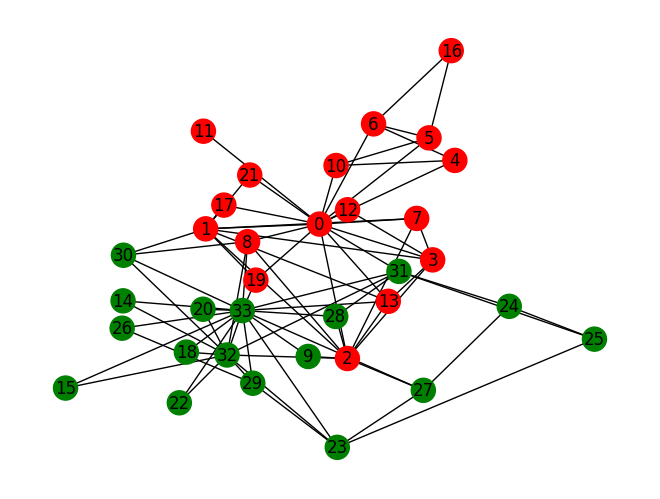

In [2]:
color_map=[]
list = []
counter = 0
for i in range(34):
  list.append(counter)
  counter += 1
for i in list:
  if i < 9 or i ==10 or i == 11 or i == 12 or i ==13 or i==16 or i ==17 or i==19 or i ==21:
      color_map.append('red')
  else:
      color_map.append('green')

nx.draw_kamada_kawai(G, with_labels=True, node_color=color_map, labels=label_nodes(G))

# Q2: Predicting the split via Girvan-Newman

#### Using the while loop, we can select how many connected components we want the final graph to have. To illustrate the process, I will run it with 1, 2, and 5 final connected components.

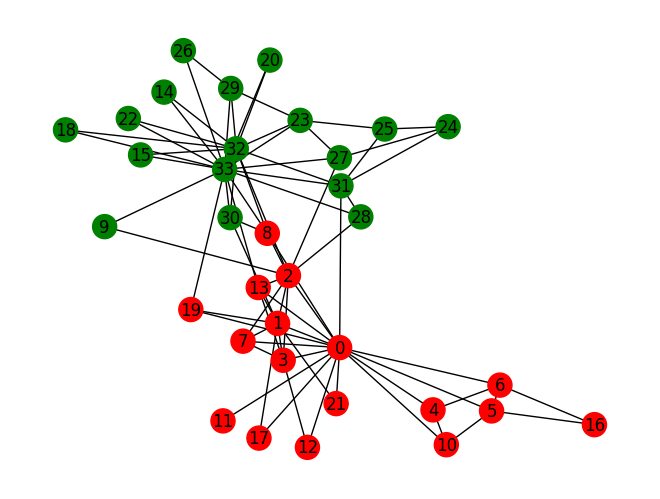

In [10]:
G = nx.karate_club_graph()

def girvan_newman(graph):
    while graph.number_of_edges() > 0 and nx.number_connected_components(graph) != 1:
        betweenness = nx.edge_betweenness_centrality(graph)
        max_B = max(betweenness.values())
        max_B_edges = [edge for edge, centrality in betweenness.items() if centrality == max_B]
        for edge in max_B_edges:
            graph.remove_edge(*edge)

girvan_newman(G)
nx.draw_spring(G, with_labels=True, node_color=color_map, labels=label_nodes(G))

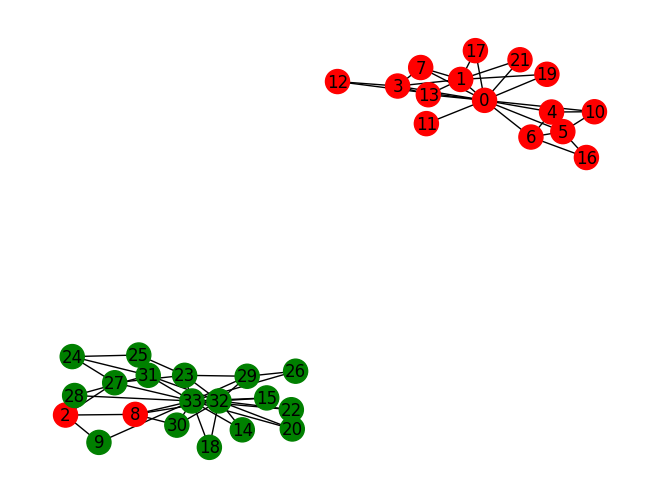

In [11]:
G = nx.karate_club_graph()

def girvan_newman(graph):
    while graph.number_of_edges() > 0 and nx.number_connected_components(graph) != 2:
        betweenness = nx.edge_betweenness_centrality(graph)
        max_B = max(betweenness.values())
        max_B_edges = [edge for edge, centrality in betweenness.items() if centrality == max_B]
        for edge in max_B_edges:
            graph.remove_edge(*edge)

girvan_newman(G)
nx.draw_spring(G, with_labels=True, node_color=color_map, labels=label_nodes(G))

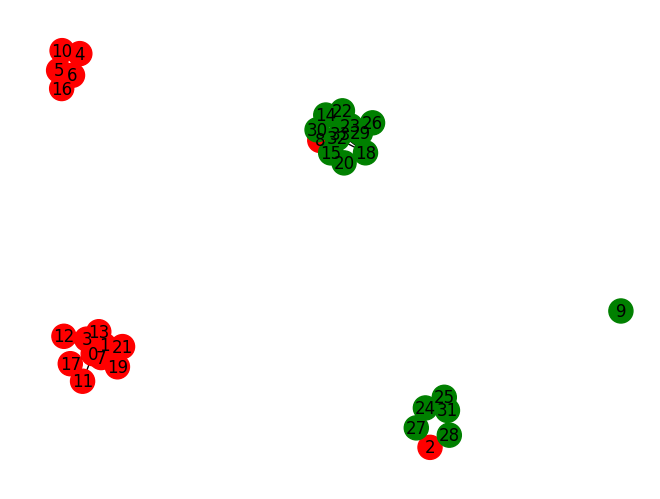

In [12]:
G = nx.karate_club_graph()

def girvan_newman(graph):
    while graph.number_of_edges() > 0 and nx.number_connected_components(graph) != 5:
        betweenness = nx.edge_betweenness_centrality(graph)
        max_B = max(betweenness.values())
        max_B_edges = [edge for edge, centrality in betweenness.items() if centrality == max_B]
        for edge in max_B_edges:
            graph.remove_edge(*edge)

girvan_newman(G)
nx.draw_spring(G, with_labels=True, node_color=color_map, labels=label_nodes(G))

# Q3. Comparing the splits

####For the 2 component split, the result resembles mostly the final destination of the students with only 2 nodes ending up in a different group. This shows a relatively good accuracy for the Girvan-Newman predictive algorithm.

#### Q: Did all of the same colored nodes end up in the same group? If not, what is different?

#### For the Girvan-Newman split, all nodes ended up the same with the exception of nodes 2 and 8, who this time ended up with John instead of Mr. Hi.